# Project: Wrangling and Analyze Data

### My tasks in this project are as follows:

Data wrangling, which consists of:
Gathering data
Assessing data
Cleaning data
Storing, analyzing, and visualizing your wrangled data
Reporting on Gathering data with my data wrangling skills and data analyses and visualizations


In [203]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import requests
import datetime
import json
import re
from IPython.display import Image
from functools import reduce
import matplotlib.pyplot as plt
import matplotlib.figure

%matplotlib inline

## Data Gathering
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [204]:
#open the csv file
df_twitter_archive = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv')
df_twitter_archive.head() #check the first five rows

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Tweet Image Prediction

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [205]:
# Downloaded the image prediction file using the link provided in the classroom
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(image_request.content)

335079

In [206]:
#showing the data in the image prediction file
df_image_prediction = pd.read_csv('image_predictions.tsv', sep = '\t')
df_image_prediction.head() #check the five rows

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Downloaded Twitter JSON file

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [207]:
# Create a list to append the json file inside the list
data_list = []
with open("tweet-json.txt", "r") as file:
    for line in file:
        if line:
            data_list.append(json.loads(line))

In [208]:
len(data_list) #check the length of the list

2354

In [209]:
#Create another list and run a for loop to get the tweet in the data_list
#create a dictionary for the columns and append it into pd_list
pd_list = []
for tweet in data_list:
    id_ = tweet["id"]
    favorite_count = tweet["favorite_count"]
    retweet_count = tweet["retweet_count"]
    
    pd_dict = {"id":id_,
               "favorite_count":favorite_count,
                "retweet_count":retweet_count}
    pd_list.append(pd_dict)

In [210]:
pd_list[0]

{'id': 892420643555336193, 'favorite_count': 39467, 'retweet_count': 8853}

In [211]:
#we write this list into a txt file:
df_tweet = pd.DataFrame(pd_list)
df_tweet.head()

,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Assessing Twitter Archive data

In [212]:
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [213]:
df_twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
1522,690649993829576704,NaN,NaN,2016-01-22 21:39:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hazel. She's a gymnast. Training hard ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690649993...,11,10,Hazel,None,None,None,None
623,796031486298386433,NaN,NaN,2016-11-08 16:47:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Daisy. She's here to make your day bet...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796031486...,13,10,Daisy,None,None,None,None
400,824775126675836928,NaN,NaN,2017-01-27 00:24:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scooter. His lack of opposable thumbs ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/824775126...,12,10,Scooter,None,None,None,None
854,765222098633691136,NaN,NaN,2016-08-15 16:22:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gromit. He's pupset because there's no...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765222098...,10,10,Gromit,None,None,None,None


In [214]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [215]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [216]:
df_twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
Sadie          8
the            8
an             7
Bailey         7
Buddy          7
Daisy          7
Toby           7
Stanley        6
Koda           6
Bella          6
Milo           6
Rusty          6
Leo            6
Dave           6
Jax            6
Scout          6
Jack           6
Oscar          6
Bentley        5
            ... 
Tripp          1
Strider        1
Evy            1
Rontu          1
Mosby          1
Josep          1
Trevith        1
Saydee         1
Storkson       1
Jarvis         1
Roscoe         1
Ricky          1
Mimosa         1
Mutt           1
Gert           1
Mason          1
Miley          1
Kuyu           1
Napolean       1
Rolf           1
Socks          1
Oddie          1
Alexander      1
Tayzie         1
Kingsley       1
Carll          1
Joshwa         1
Nico          

In [217]:
df_twitter_archive.text[1]

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"

In [218]:
df_twitter_archive.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/844704788403113984/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/667152164079423490/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/786233965241827333/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/837820167694528512/photo/1,https://twitter.com/dog_rates/status/837820167694528512/photo/1                                                                                          

In [219]:
type(df_twitter_archive.timestamp[0])

str

In [220]:
df_twitter_archive.duplicated().sum()

0

In [221]:
df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [222]:
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

### Assessing Image Prediction Data

In [223]:
df_image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [224]:
df_image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
62,667160273090932737,https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg,1,golden_retriever,0.471351,True,miniature_poodle,0.091992,True,standard_poodle,0.087385,True
1790,830097400375152640,https://pbs.twimg.com/media/C4UZLZLWYAA0dcs.jpg,4,toy_poodle,0.442713,True,Pomeranian,0.142073,True,Pekinese,0.125745,True
474,675147105808306176,https://pbs.twimg.com/media/CV6atgoWcAEsdv6.jpg,1,golden_retriever,0.949215,True,Labrador_retriever,0.016765,True,flat-coated_retriever,0.010637,True
1353,760190180481531904,https://pbs.twimg.com/media/Coy87yiWYAACtPf.jpg,1,balloon,0.917525,False,confectionery,0.049329,False,maraca,0.017648,False
1134,728653952833728512,https://pbs.twimg.com/media/Chyy5lQWUAEzxSL.jpg,2,window_shade,0.594333,False,studio_couch,0.053515,False,rotisserie,0.041248,False
73,667369227918143488,https://pbs.twimg.com/media/CUL4xR9UkAEdlJ6.jpg,1,teddy,0.709545,False,bath_towel,0.127285,False,Christmas_stocking,0.028568,False
1682,813910438903693312,https://pbs.twimg.com/media/C0uXObSXUAAIzmV.jpg,1,Siberian_husky,0.699355,True,Eskimo_dog,0.256433,True,Norwegian_elkhound,0.013189,True
1655,810284430598270976,https://pbs.twimg.com/media/Cz61ZD4W8AAcJEU.jpg,1,malamute,0.620768,True,Eskimo_dog,0.158395,True,Tibetan_mastiff,0.028962,True
604,679854723806179328,https://pbs.twimg.com/media/CW9UQ7oWkAAErmU.jpg,1,llama,0.887963,False,ram,0.095021,False,chow,0.002307,True
279,671109016219725825,https://pbs.twimg.com/media/CVBCFkyU4AE2Wcr.jpg,1,basenji,0.855959,True,beagle,0.036723,True,toy_terrier,0.029258,True


In [225]:
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [226]:
df_image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [227]:
type(df_image_prediction.jpg_url[0])

str

In [228]:
df_image_prediction.duplicated().sum()

0

### Assessing Tweet Data

In [229]:
df_tweet.head()

,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


In [230]:
df_tweet.sample(5)

,favorite_count,id,retweet_count
517,12192,810657578271330305,3057
2292,4851,667138269671505920,2387
311,8503,835264098648616962,1939
826,16017,768970937022709760,7574
1423,2638,697943111201378304,776


In [231]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
id                2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [232]:
df_tweet.describe()

,favorite_count,id,retweet_count
count,2354.000000,2.354000e+03,2354.000000
mean,8080.968564,7.426978e+17,3164.797366
std,11814.771334,6.852812e+16,5284.770364
min,0.000000,6.660209e+17,0.000000
25%,1415.000000,6.783975e+17,624.500000
50%,3603.500000,7.194596e+17,1473.500000
75%,10122.250000,7.993058e+17,3652.000000
max,132810.000000,8.924206e+17,79515.000000


In [233]:
df_tweet.duplicated().sum()

0

### 1. Quality issues

1. id column name should be "tweet_id" instead of "id"

2. tweet_id should be "str" and not "int"

3. Some values in rating_denominator column are not "10"

4. Some values in rating_numerator column are less than "10"

5. Some values in rating_numerator is equal to zero.

6. retweeted_status_id should be removed since we are interested in the tweet.

7. retweeted_status_user_id should be removed since we are interested in the tweet.

8. retweeted_status_timestamp should be removed since we are interested in the tweet.

9. Nulls represented as "none" in the name column.

10. in columns "conf" should be confident


### 2. Tidiness

1. combining the three dataframes in one dataframe

2. doggo, floofer, pupper, and puppo should be in 1 column not 4 columns

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [234]:
# Make copies of original pieces of data

clean_df_twitter_archive = df_twitter_archive.copy()
clean_df_image_prediction = df_image_prediction.copy()
clean_df_tweet = df_tweet.copy()

### Issue #1:

#### Define:

* replace the name column from "id" to "tweet_id"

#### Code

In [235]:
clean_df_tweet.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [236]:
clean_df_tweet.head()

,favorite_count,tweet_id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


### Issue #2:

* tweet_id should be "string" not "int" for all the three data

#### Define

* convert column type with astype method

#### Code

In [237]:
clean_df_twitter_archive['tweet_id'] = clean_df_twitter_archive['tweet_id'].astype(str)
clean_df_image_prediction['tweet_id'] = clean_df_image_prediction['tweet_id'].astype(str)
clean_df_tweet['tweet_id'] = clean_df_tweet['tweet_id'].astype(str)

#### Test

In [238]:
type(clean_df_twitter_archive['tweet_id'][0])


str

In [239]:
type(clean_df_image_prediction['tweet_id'][0])

str

In [240]:
type(clean_df_tweet['tweet_id'][0])

str

### Issue #3:

* some values in rating_denominator column isn't "10"

#### Define

* replace the values from any number less than 10 to 10

#### Code 

In [241]:
clean_df_twitter_archive.rating_denominator = clean_df_twitter_archive.rating_denominator.replace(range(0,1000), 10)     

#### Test

In [242]:
clean_df_twitter_archive.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

### Issue #4, 5:

* some values in rating_numerator column less than "10"
* some values in rating_numerator column = zero

#### Define

* adding 10 to correct this values

#### Code

In [243]:
clean_df_twitter_archive.rating_numerator[clean_df_twitter_archive['rating_numerator'] <= 10 ] = clean_df_twitter_archive.rating_numerator[clean_df_twitter_archive['rating_numerator'] <= 10 ].add(10)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Test

In [244]:
clean_df_twitter_archive.rating_numerator.value_counts()

12      567
11      473
20      462
13      370
19      158
18      102
14       71
17       56
15       39
16       32
420       2
10        2
75        2
84        1
24        1
26        1
44        1
50        1
60        1
80        1
165       1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

### Issue #6,7,8:

* retweeted_status_id should be removed
* retweeted_status_user_id should be removed
* retweeted_status_timestamp should be removed

#### Define

* remove this columns using drop method

#### Code

In [245]:
clean_df_twitter_archive = clean_df_twitter_archive.drop(columns=['retweeted_status_id' , 'retweeted_status_user_id' , 'retweeted_status_timestamp'])

#### Test

In [246]:
clean_df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2356 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null object
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
doggo                    2356 non-null object
floofer                  2356 non-null object
pupper                   2356 non-null object
puppo                    2356 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 257.8+ KB


### Issue #9:

 * Nulls represented as none in name column

#### Define

* replace this values with nulls using replace method and numpy nan method

#### Code

In [247]:
clean_df_twitter_archive.name = df_twitter_archive.name.replace("None", value = np.nan )

#### Test

In [248]:
clean_df_twitter_archive.name.isnull().sum()

745

### Issue #10:

* in columns "conf" should be confident

#### Define

* edit the name of the column using rename method

##### Code

In [249]:
clean_df_twitter_archive.rename(columns={'p1_conf': 'p1_confident'}, inplace=True)
clean_df_twitter_archive.rename(columns={'p2_conf': 'p2_confident'}, inplace=True)
clean_df_twitter_archive.rename(columns={'p3_conf': 'p3_confident'}, inplace=True)

#### Test

In [250]:
clean_df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## 2. Tidiness

### Issue #1:

* doggo, floofer, pupper, and puppo should be in one column not 4

#### Define

* extract dog stage from text and put it in new column 'dog stage' then drop the real columns

#### Code

In [251]:
clean_df_twitter_archive['Dog_stage'] = clean_df_twitter_archive['text'].str.extract('(doggo|floofer|pupper|puppo)')
clean_df_twitter_archive = clean_df_twitter_archive.drop(columns=['doggo','floofer','pupper','puppo'])

#### Test

In [252]:
clean_df_twitter_archive['Dog_stage'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: Dog_stage, dtype: int64

### Issue #2:

* combining the three dataframes in one dataframe

#### Define

* merging tables with merge method

#### Code

In [253]:
df = pd.merge(clean_df_twitter_archive, clean_df_image_prediction, on= 'tweet_id', how='left') 
df_master = pd.merge(df, clean_df_tweet, on= 'tweet_id', how='left')

#### Test

In [254]:
df_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467.0,8853.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461.0,4328.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908.0,8964.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048.0,9774.0


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [255]:
clean_df_twitter_archive.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

#### 1. Check for the dog ratios

####  Visualization:

<Container object of 4 artists>

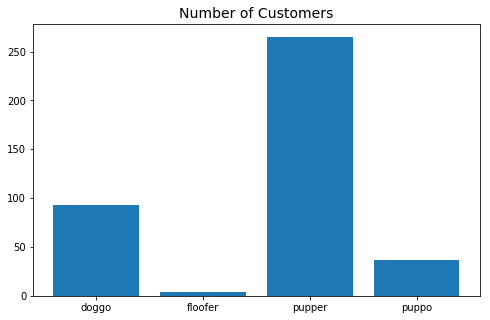

In [256]:
plt.figure(figsize=(8,5))
plt.title("Number of Customers", fontsize=14)
plt.bar(x=clean_df_twitter_archive['Dog_stage'].value_counts().index,
        height=clean_df_twitter_archive.Dog_stage.value_counts().values)

#### Insights:

* pupper is the Most Popular stage
* floofer is the least popular stage

#### 2. The success rate of algorithm

In [257]:
clean_df_image_prediction['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [258]:
total = (1532+543)
sucsses_p1 = (1532/total)*100
sucsses_p1

73.83132530120481

#### Visualization

<Container object of 2 artists>

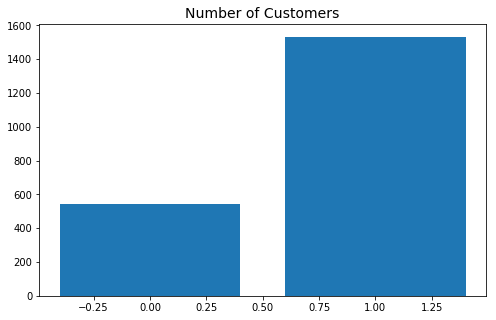

In [259]:
plt.figure(figsize=(8,5))
plt.title("Number of Customers", fontsize=14)
plt.bar(x=clean_df_image_prediction['p1_dog'].value_counts().index, height=clean_df_image_prediction.p1_dog.value_counts().values)

In [260]:
clean_df_image_prediction['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [261]:
total= (1553+522)
sucsses_p2 = (1553/total)*100
sucsses_p2

74.8433734939759

<Container object of 2 artists>

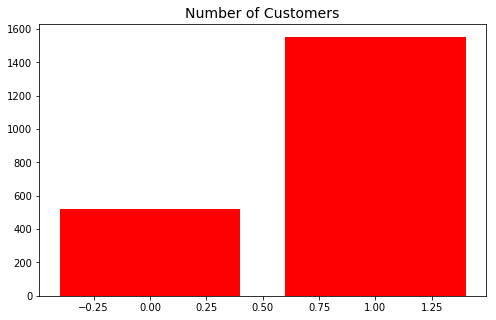

In [262]:
plt.figure(figsize=(8,5))
plt.title("Number of Customers", fontsize=14)
plt.bar(x=clean_df_image_prediction['p2_dog'].value_counts().index, height=clean_df_image_prediction.p2_dog.value_counts().values, color='red')

In [263]:
clean_df_image_prediction['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [264]:
total= (1499+576)
sucsses_p3 = (1499/total)*100
sucsses_p3


72.2409638554217

<Container object of 2 artists>

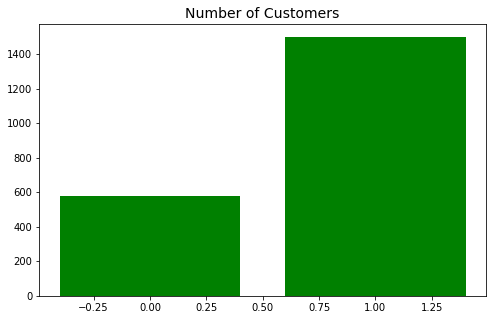

In [265]:
plt.figure(figsize=(8,5))
plt.title("Number of Customers", fontsize=14)
plt.bar(x=clean_df_image_prediction['p3_dog'].value_counts().index, height=clean_df_image_prediction.p3_dog.value_counts().values, color='green')

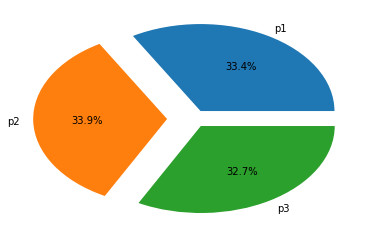

In [266]:
plt.pie([sucsses_p1,sucsses_p2,sucsses_p3], labels=('p1','p2','p3'), explode = [0.1,0.2,0.1],autopct ='%1.1f%%')
plt.show()

#### Insights

* p2_algorithm is The most successful algorithm
* p3_algorithm is The least successful algorithm